# EDA on SampleSuperStore

In [31]:
#importng all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading csv file
data=pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
print('Dataset Shape: ',data.shape)

Dataset Shape:  (9994, 13)


In [9]:
print('Namesof column:',data.columns)

Namesof column: Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [11]:
print('Number of duplicate values',data.duplicated().sum())

Number of duplicate values 17


In [13]:
print('Rows conatining null values\n',data.isnull().sum())

Rows conatining null values
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


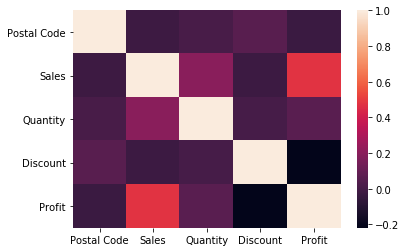

In [17]:
sns.heatmap(data.corr())

In [18]:
#remove the duplicate values
data=data.drop_duplicates()

# EDA

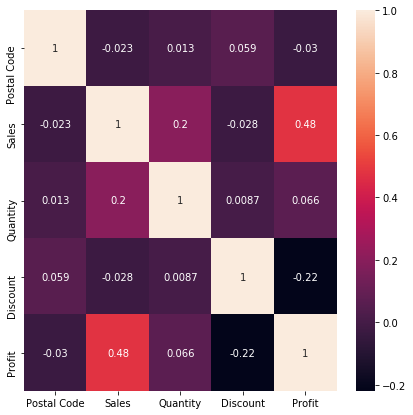

In [19]:
#correlation matrix
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)

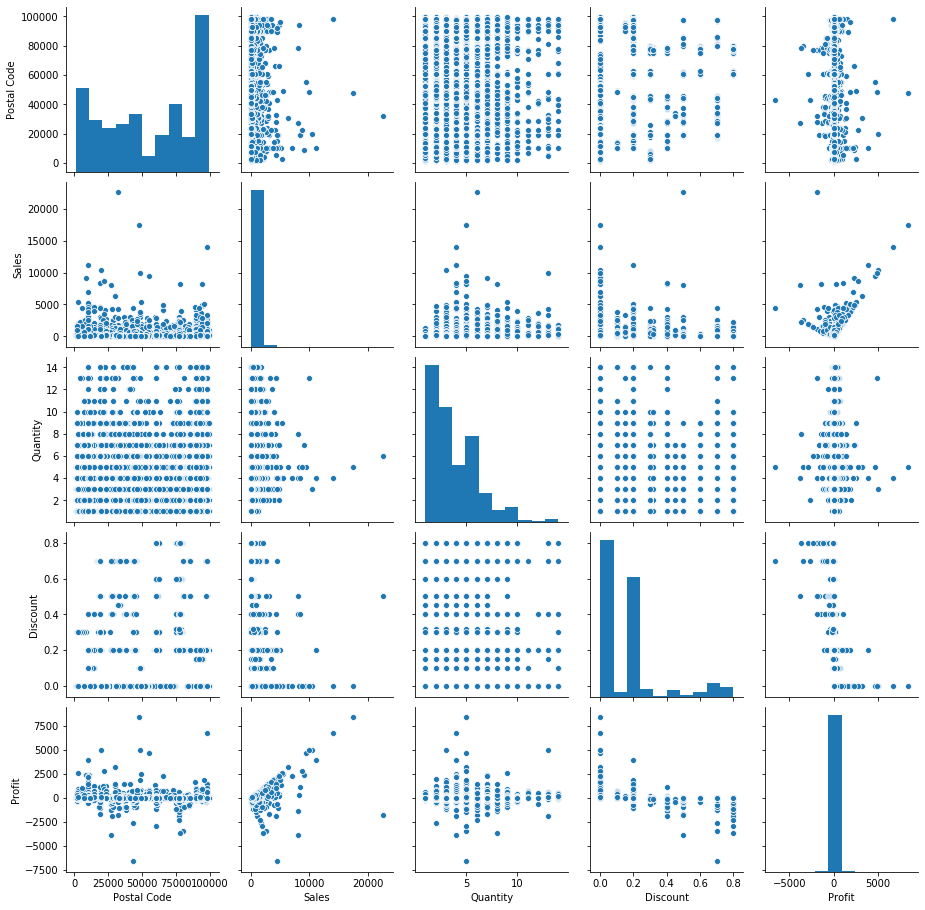

In [20]:
sns.pairplot(data)

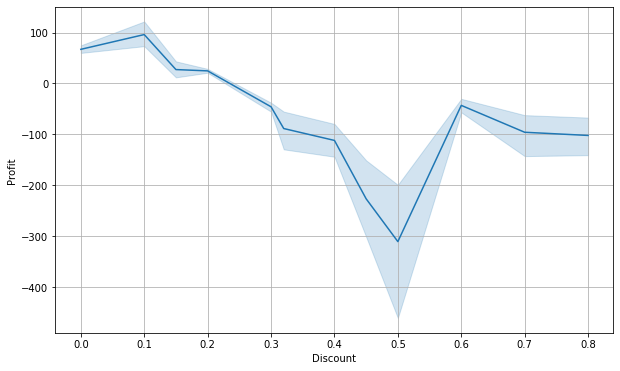

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Discount',y='Profit',data=data)
plt.grid(alpha=2)

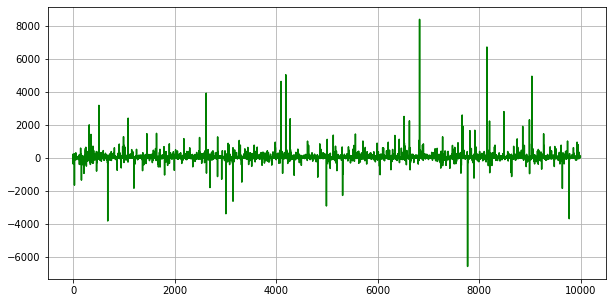

In [30]:
plt.figure(figsize=(10,5))
plt.plot(data['Profit'],color='Green')
plt.grid(alpha=2)

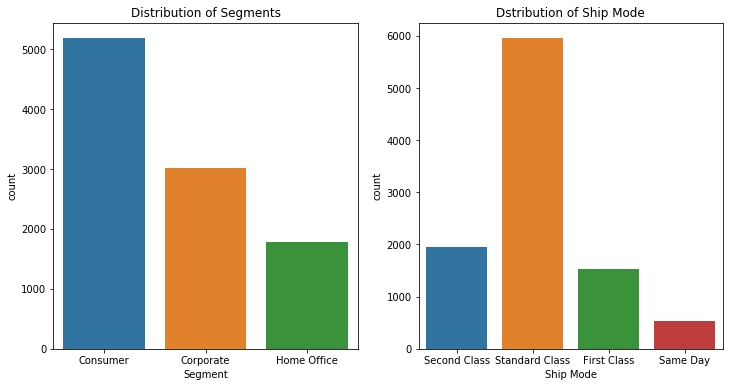

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot('Segment',data=data)
plt.title('Distribution of Segments')
plt.subplot(1,2,2)
sns.countplot('Ship Mode',data=data)
plt.title('Dstribution of Ship Mode')
plt.show()

# Distribution based on states

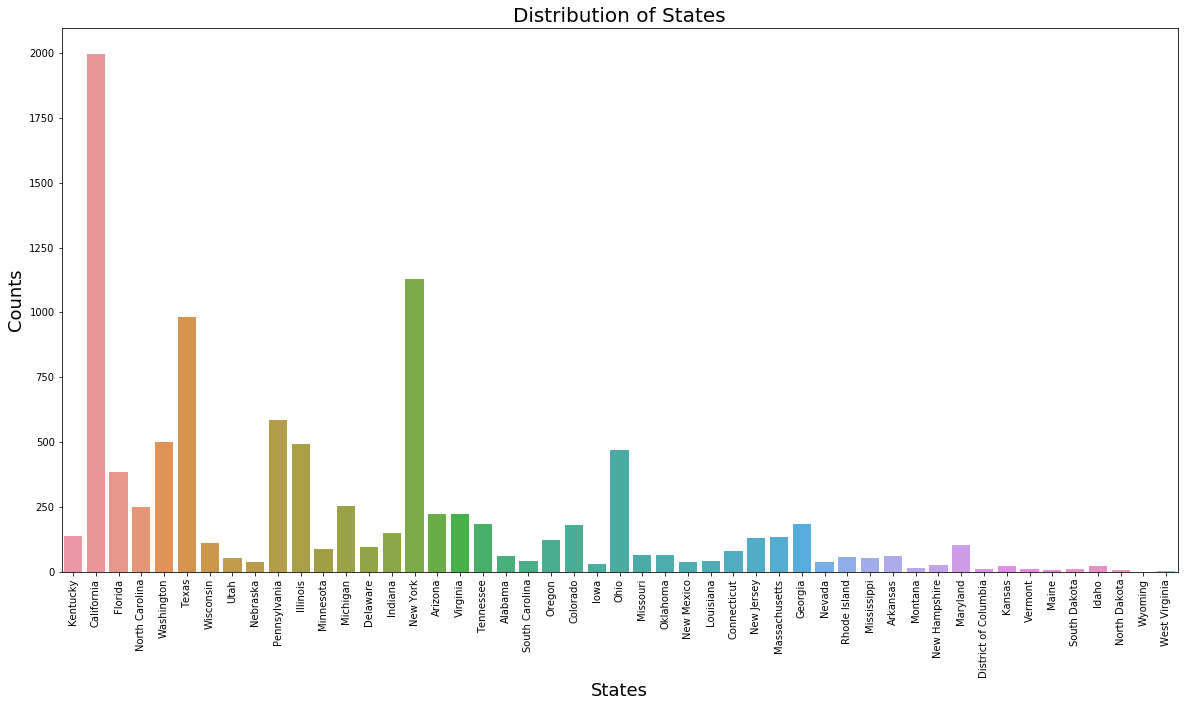

In [38]:
plt.figure(figsize=(20,10))
sns.countplot('State',data=data)
plt.xticks(rotation=90)
plt.xlabel('States',fontsize=18)
plt.ylabel('Counts',fontsize=18)
plt.title("Distribution of States",fontsize=20)
plt.show()

# Distribution based on Region/Category

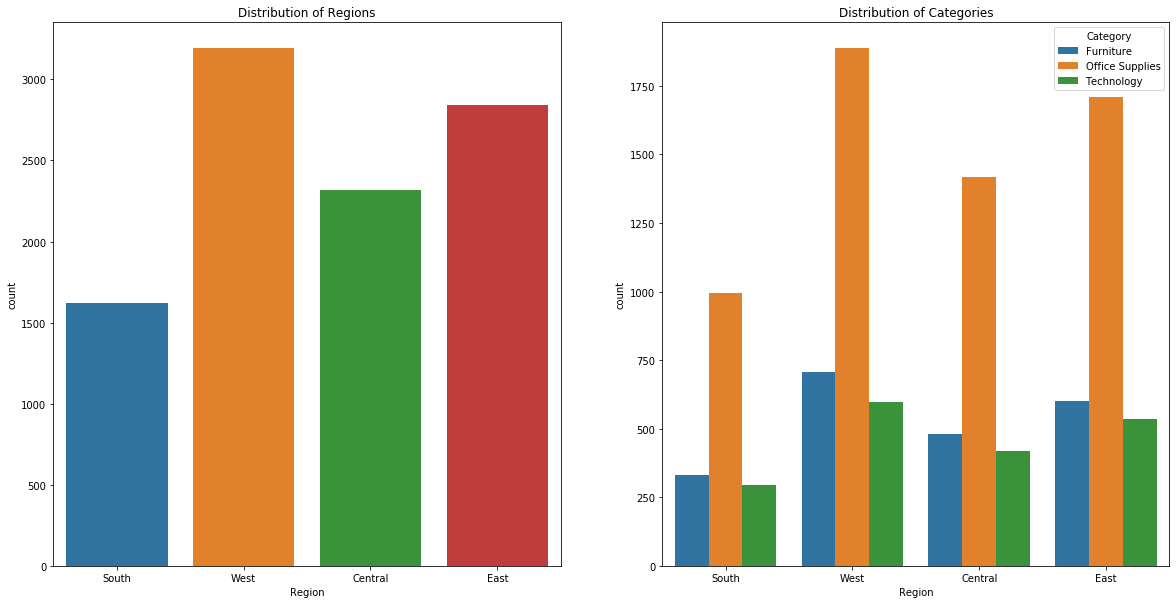

In [41]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot('Region',data=data)
plt.title('Distribution of Regions')
plt.subplot(1,2,2)
sns.countplot('Region',hue='Category',data=data)
plt.title('Distribution of Categories')
plt.show()

# Distribution based on Categories/Sub-Categories

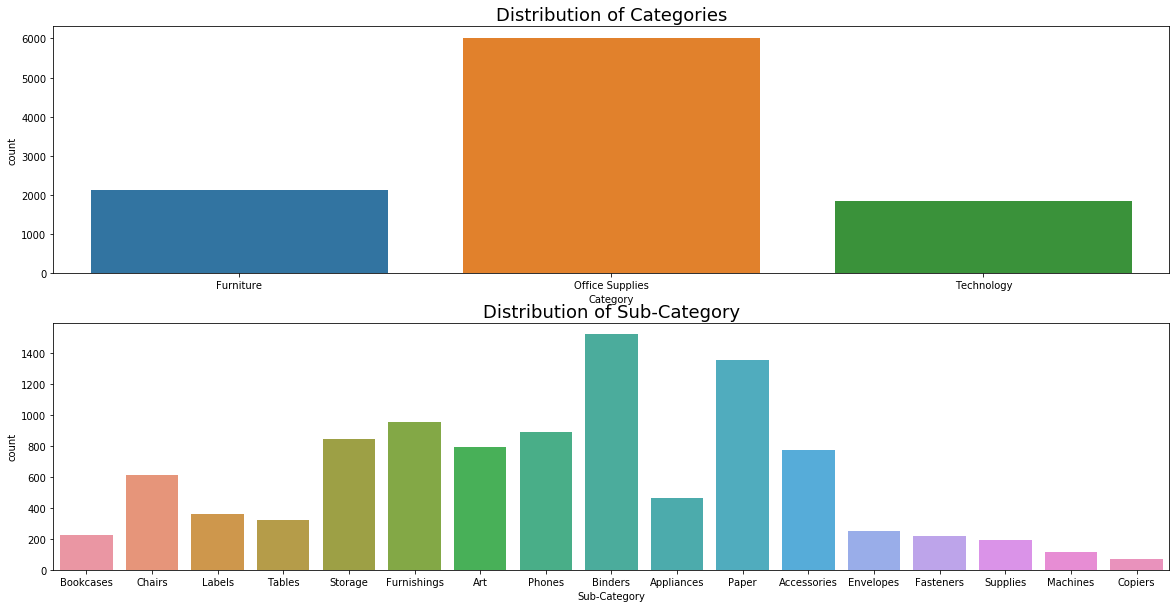

In [43]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('Category',data=data)
plt.title('Distribution of Categories',fontsize=18)
plt.subplot(2,1,2)
sns.countplot('Sub-Category',data=data)
plt.title('Distribution of Sub-Category',fontsize=18)
plt.show()

# Profit distribution among states

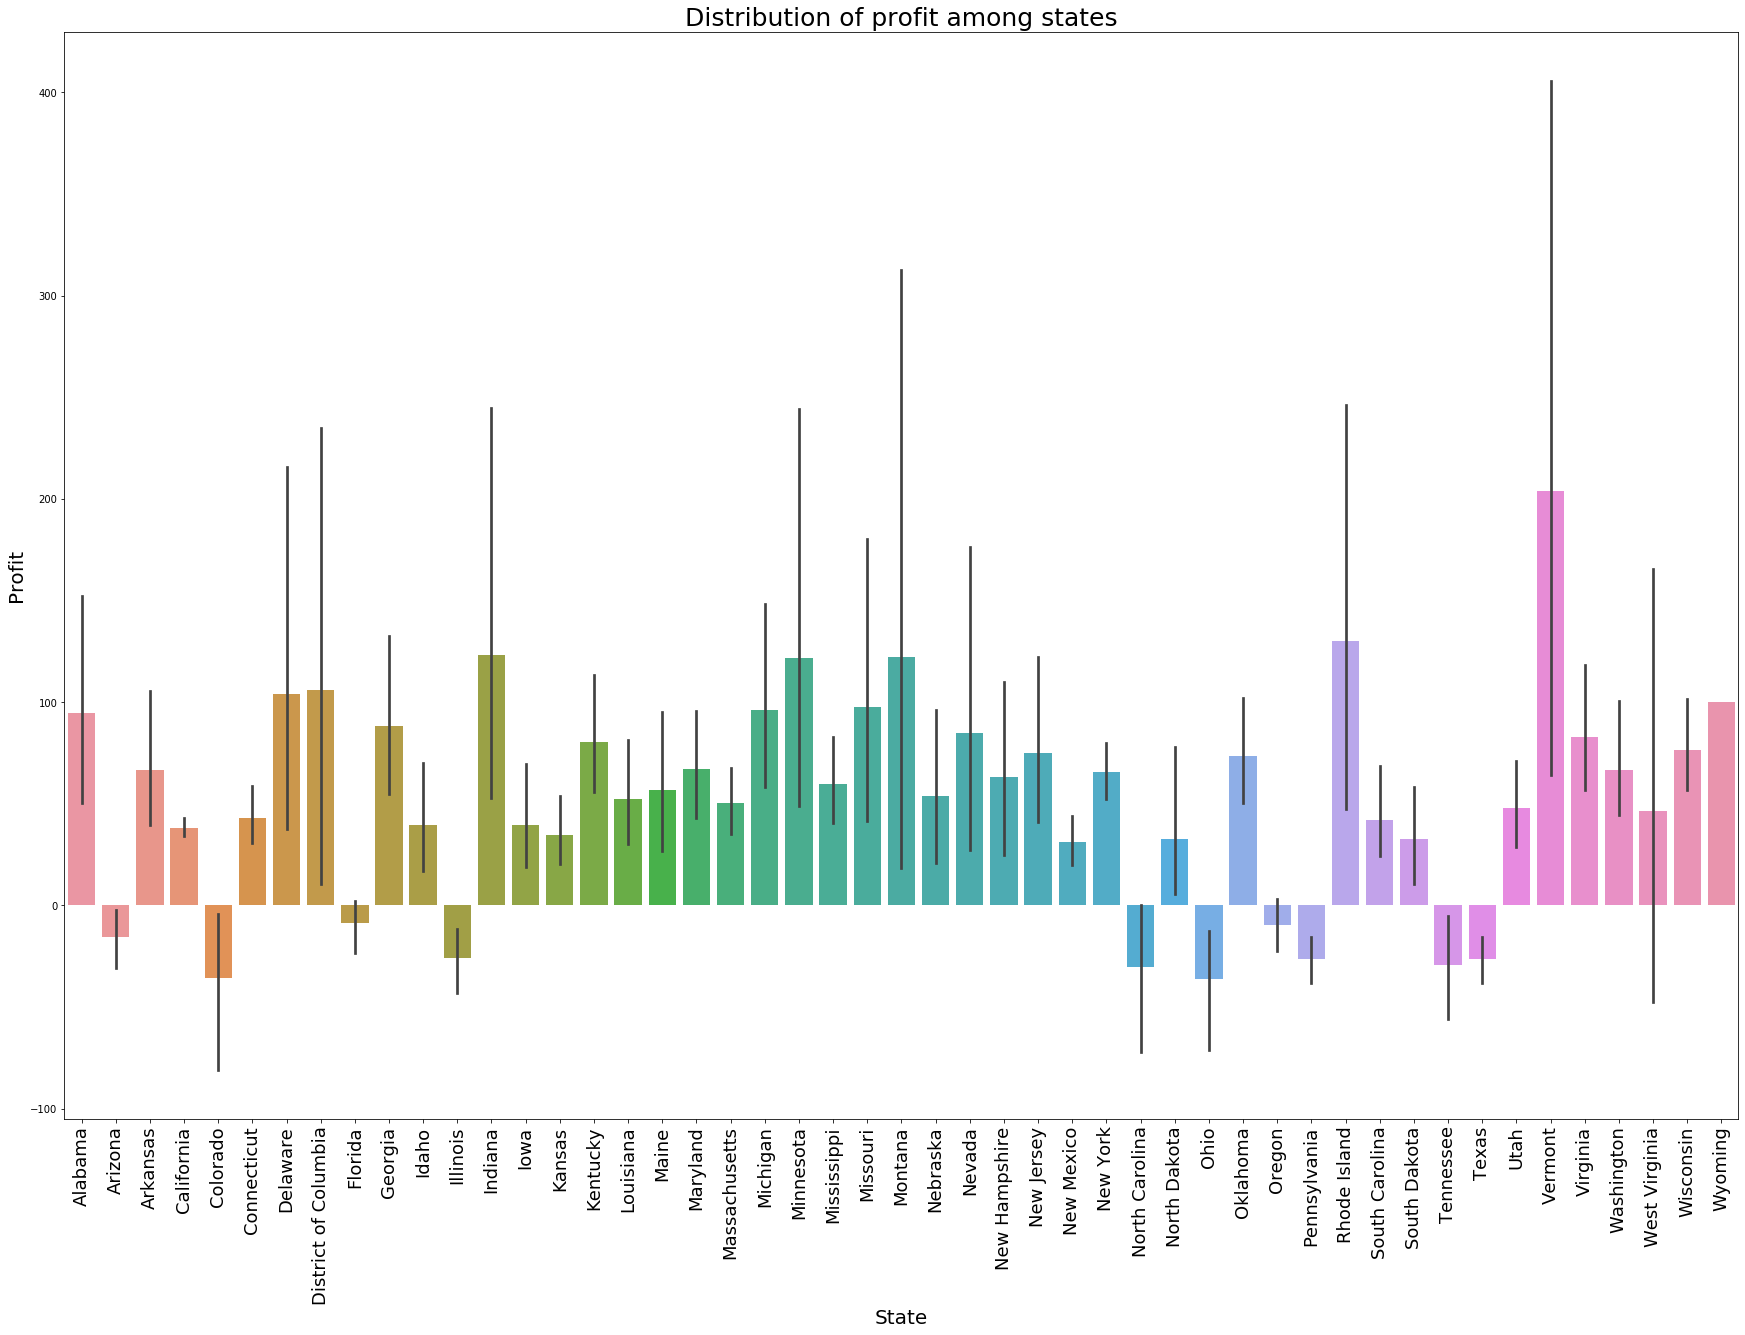

In [46]:
plt.figure(figsize=(30,20))
sns.barplot(x=data['State'].sort_values(ascending=True),y=data['Profit'])
plt.title('Distribution of profit among states',fontsize=25)
plt.xticks(rotation=90,fontsize=18)
plt.xlabel('State',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.show()